In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv('MNIST_train.csv')

label = raw_data['label']
pure_data = raw_data.drop('label', axis=1)
print(pure_data.shape)

(42000, 784)


/home/as3eem/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


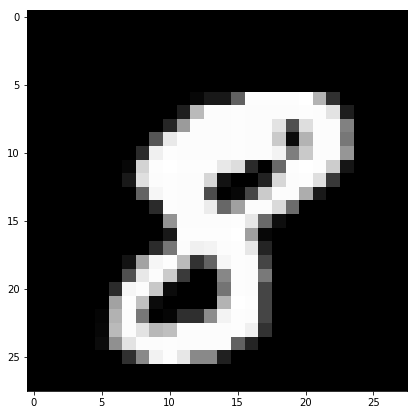

8


In [75]:
plt.figure(figsize=(7,7))
i=10

grid_data = pure_data.iloc[i].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(label[i])

In [76]:
#
# PCA lamba wala procedure
#
pure_data = pure_data.head(42000)
label = label.head(42000)
print(pure_data.shape)

(42000, 784)


In [77]:
#data-standardisation

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(pure_data)
print(standardized_data.shape)

(42000, 784)


In [78]:
# covariance matrix

sample_data = pure_data

# matrix mutiply by numpy

covar_matrix = np.matmul(sample_data.T, sample_data)

print(covar_matrix.shape)


(784, 784)


In [79]:
# EIGEN VALUES AND VECTORS

# for reducing dimension from 784-D to 2-D 
# we need two highest eigen values

from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, eigvals =(782,783))
vectors = vectors.T
print(values)

[1.20273218e+10 1.04654646e+11]


In [80]:
new_cordinates = np.matmul(vectors, sample_data.T)
print(vectors.shape, sample_data.T.shape, new_cordinates.shape)

(2, 784) (784, 42000) (2, 42000)


In [81]:
new_cordinates = np.vstack((new_cordinates,label)).T
df = pd.DataFrame(data = new_cordinates, columns = ('1st Principal', '2nd Principal', 'labls'))
print(df.head())

   1st Principal  2nd Principal  labls
0     496.627364     939.781482    1.0
1   -1591.724437    2219.158271    0.0
2     670.741316     928.988860    1.0
3    -275.255445     707.195978    4.0
4   -1804.407765    2327.202031    0.0


/home/as3eem/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


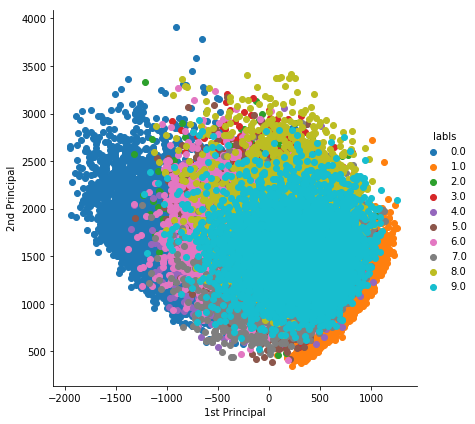

In [82]:
import seaborn as sns
sns.FacetGrid(df, hue='labls', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

In [83]:
#
# PCA using SCI-KIT LEARN ---- chota wala procedure
#
from sklearn import decomposition
pca = decomposition.PCA()

In [84]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)

(42000, 2)


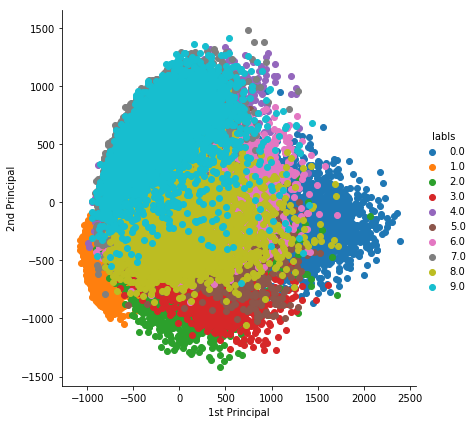

In [86]:
pca_data = np.vstack((pca_data.T,label)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('1st Principal', '2nd Principal', 'labls'))
sns.FacetGrid(pca_df, hue='labls', size=6).map(plt.scatter, '1st Principal', '2nd Principal').add_legend()
plt.show()

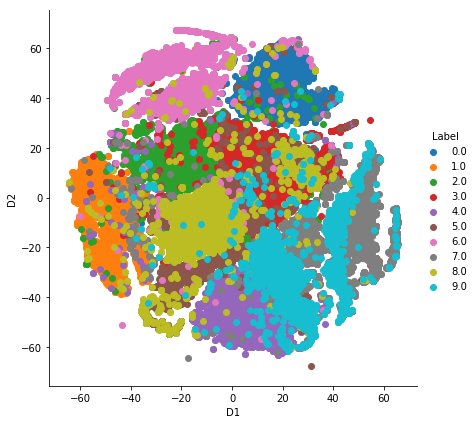

In [90]:
#
# --------TSNE------ 
#
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:42000,:]
tsne_label = label[:42000]
model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, tsne_label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=('D1', 'D2', 'Label'))

sns.FacetGrid(tsne_df, hue = 'Label', size=6).map(plt.scatter, 'D1', 'D2').add_legend()
plt.show()